# Importação da bibliotecas

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import glob
import matplotlib.pyplot as plt
from sklearn.utils.extmath import randomized_svd

# Definição de constantes

In [2]:
m = 120 # altura da imagem
n = 90 # largura da imagem
DIMENSAO_IMAGEM = (m, n)

# Definição de funções

In [3]:
def tratar_imagem(caminho: str) -> np.ndarray :
    # Carrega a imagem em uma variável
    imagem = Image.open(caminho)

    # Altera as dimensões para o padrão de PIL (largura, altura)
    dim_imagem = tuple(reversed(DIMENSAO_IMAGEM))
    
    # Redimensiona a imagem
    imagem = imagem.resize((dim_imagem))
    # Converte a imagem para escala de cinza
    imagem = imagem.convert('L')
    
    # Converte a imagem para um vetor
    vetor_imagem = np.array(imagem)
    # Torna o vetor unidmentsinal e o normaliza
    vetor_imagem = vetor_imagem.flatten() / 255.0
    
    return vetor_imagem


def plotar_imagem(vetor_imagem: np.ndarray) -> None :
    # Transforma o vetor unidmensional em uma matriz (m x n)
    imagem = np.reshape(vetor_imagem, (DIMENSAO_IMAGEM))

    # Configurações para a plotagem da imagem
    plot = plt.imshow(imagem, cmap='gray')
    plt.axis('off')
    plt.show()

    return None


def varrer_banco_imagens(caminho: str) -> (int, np.ndarray) :
    # Gera uma lista com os vetores das faces
    banco_imagens = []
    # Instancia um contador
    quantidade_imagens = 0
    
    for arquivo in glob.glob(caminho):
        banco_imagens.append(tratar_imagem(arquivo))
        quantidade_imagens += 1
        
    # Converte a lista para uma matriz (q x m*n), sendo 'q' a quantidade de imagens
    matriz_imagens = np.array(banco_imagens)
    # Transpoe a matriz, que passa a ser (m*n x q)
    matriz_imagens = matriz_imagens.T
    
    return (quantidade_imagens, matriz_imagens)


def plotar_grade(matriz: np.ndarray, descricao: str, qtd_linhas: int, qtd_colunas: int, tamanho: tuple) -> None :
    # Definição de uma grade para a plotagem de imagens
    fig, axes = plt.subplots(qtd_linhas, qtd_colunas, figsize=tamanho)
    
    for indice, ax in enumerate(axes.flat):
        # Definição da imagem a ser plotada
        matriz_imagem = matriz[:, indice].reshape(DIMENSAO_IMAGEM)

        # Ajustes para a plotagem
        ax.imshow(matriz_imagem, cmap=plt.cm.gray)
        ax.set_title(f'{descricao} {indice + 1}')
        ax.axis('off')
    
    plt.show()
    
    return None

# Gerar matrizes A e M, e a face média 

In [4]:
# Matriz A(mn x q) na qual as colunas são as 'q' imagens do banco de imagens
(q, A) = varrer_banco_imagens('banco_imagens/*')

# Vetor f(mn x 1) com a média das colunas A, no caso, a face média
face_media = np.mean(A, axis=1, keepdims=True)

# Matriz M(mn x q) de média corrigida
M = A - face_media 

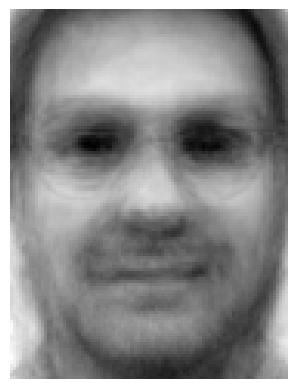

In [5]:
plotar_imagem(face_media)

# Visualizar as faces originais (em A) e as faces corrigidas pela média (em M)

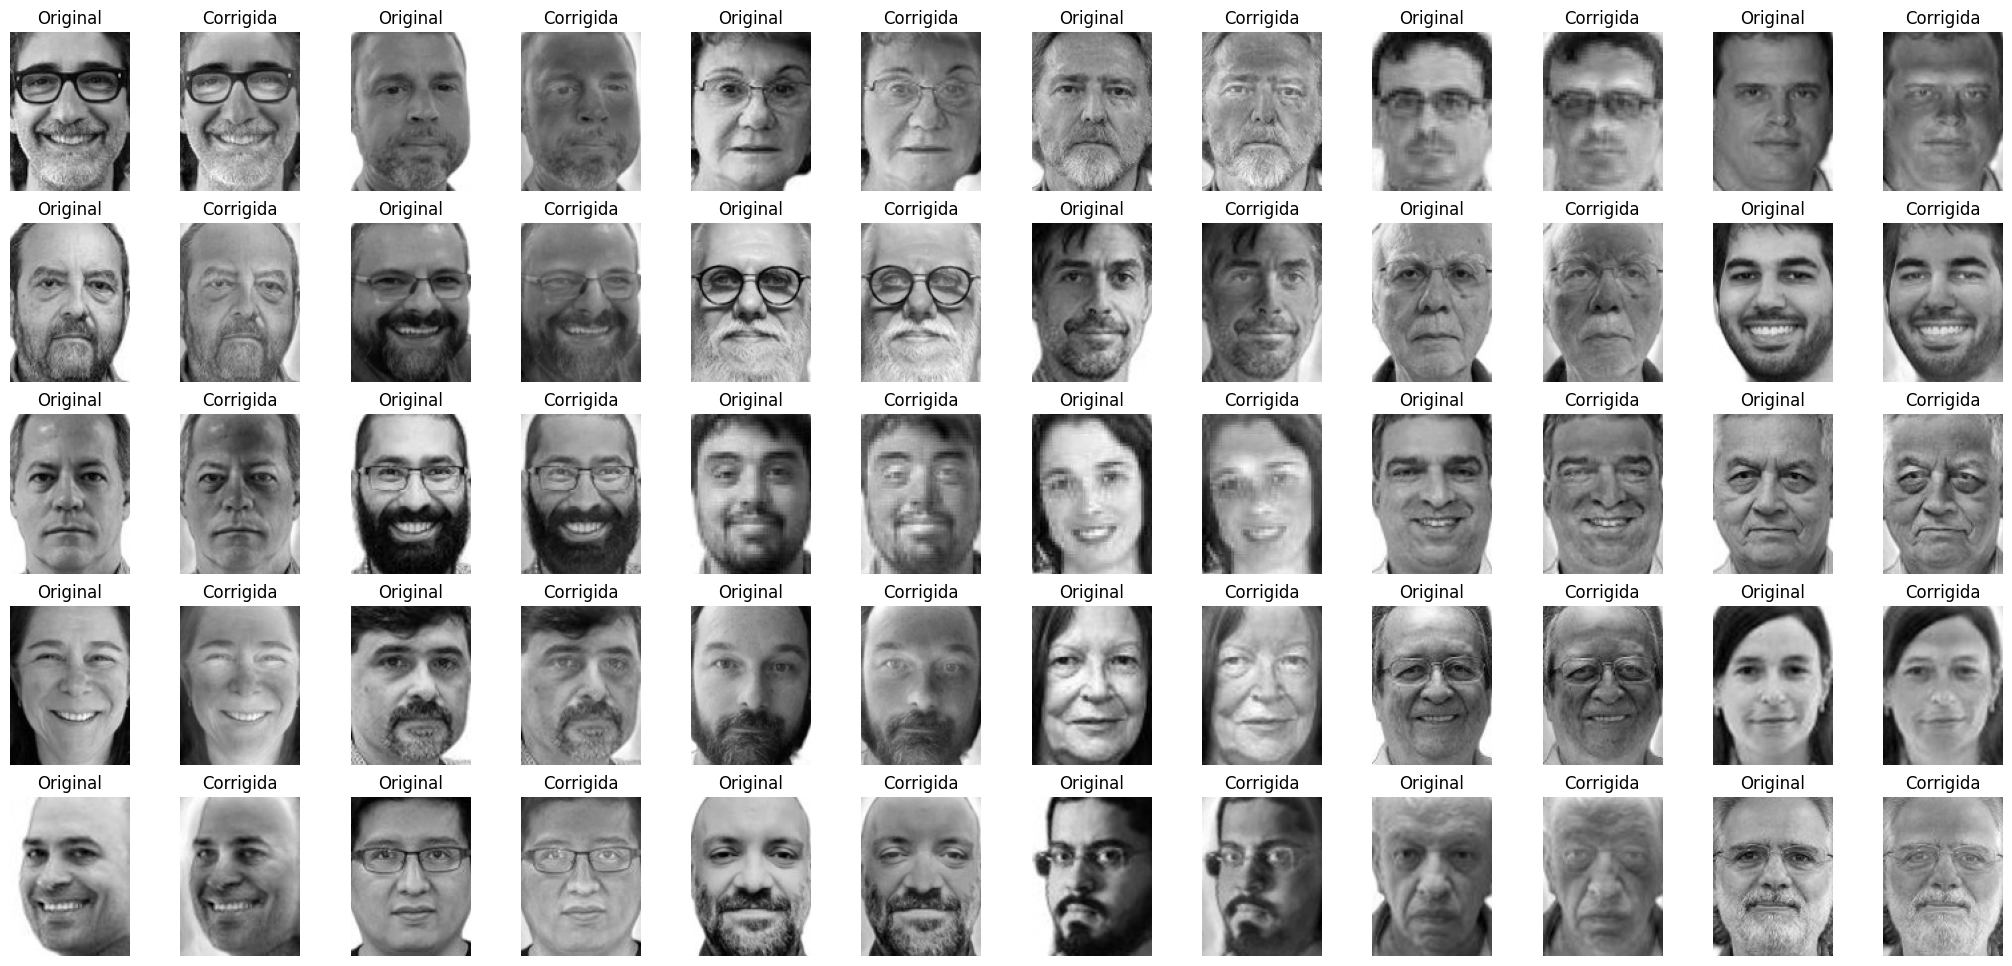

In [6]:
# Definição de uma grade para a plotagem de imagens
fig, axes = plt.subplots(5,12, figsize=(26,12))

for i, ax in enumerate(axes.flat):
    # Divide por 2 para alternar entre A e M
    indice = i // 2 
    
    # Definição da imagem a ser plotada
    tipo = 'Original' if not i % 2 else 'Corrigida'
    Matriz = A if not i % 2 else M

    # Transforma o vetor unidimensional em uma matriz com as dimensões da imagem
    matriz_imagem = Matriz[:,indice].reshape(DIMENSAO_IMAGEM)
    
    # Plotagem das imagens
    ax.imshow(matriz_imagem, cmap=plt.cm.gray)
    ax.set_title(f'{tipo}')
    ax.axis('off')

# Gerar matrizes U e C

In [7]:
# Matriz de covariância de A, C(mn x mn)
C = np.cov(M)

Nota: U_C e U_A são matrizes de dimensão (mn x q)

In [8]:
# Decomposição SVD na forma reduzida por causa de 'full_matrices=False'
U_C, autovalores_C, VT_C = randomized_svd(C, n_components=40, n_iter=5, random_state=None)

In [9]:
# Decomposição SVD na forma reduzida por causa de 'full_matrices=False'
U_A, autovalores_A, _ = np.linalg.svd(A, full_matrices=False) # U já está ordenada em relação aos autovalores

# Visualizar eigenfaces (a partir de A)

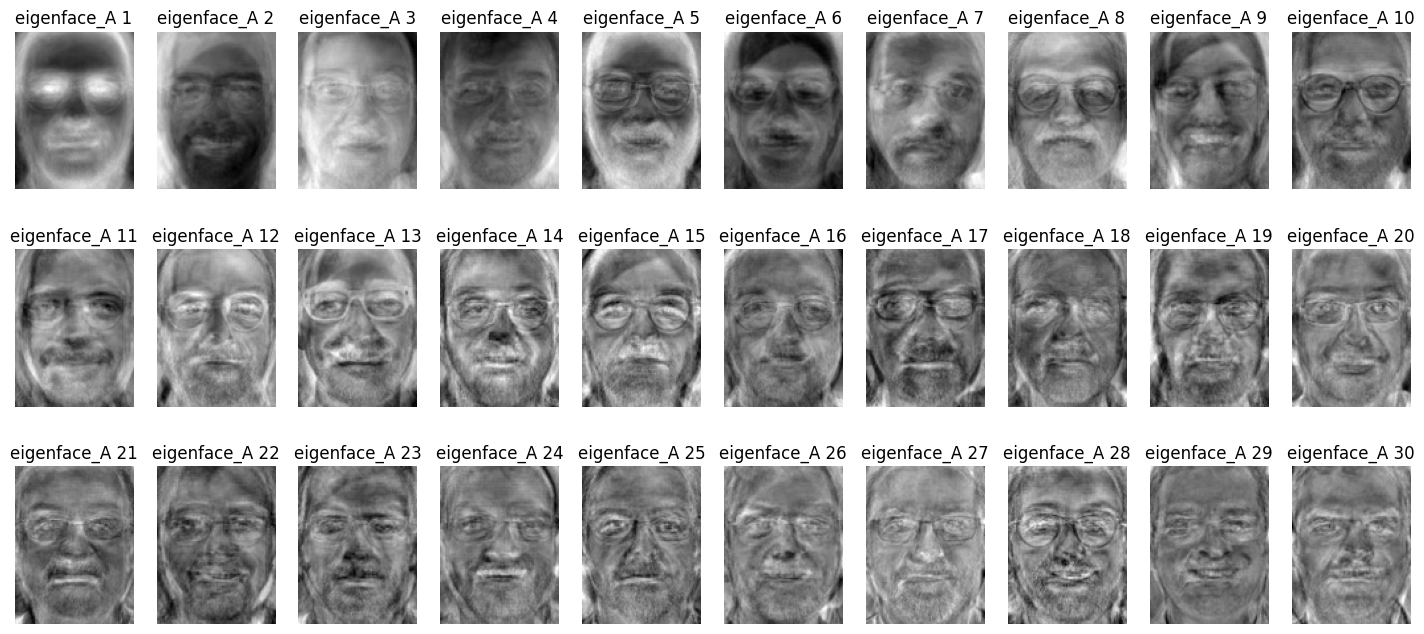

In [10]:
plotar_grade(U_A, 'eigenface_A', 3, 10, (18,8))

# Visualizar eigenfaces (a partir de C)

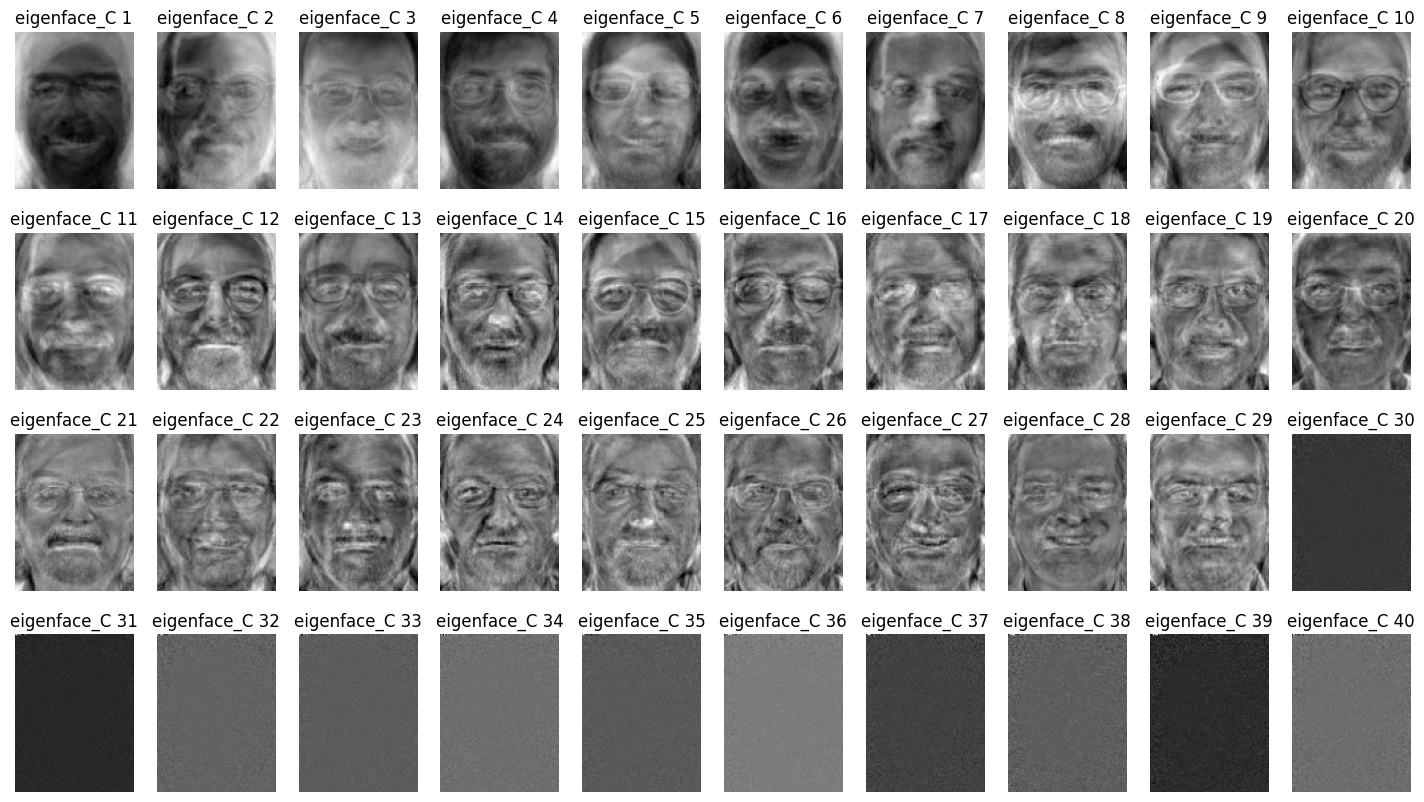

In [11]:
plotar_grade(U_C, 'eigenface_C', 4, 10, (18,10))

# Comparação entre as eigenfaces originadas de C e A

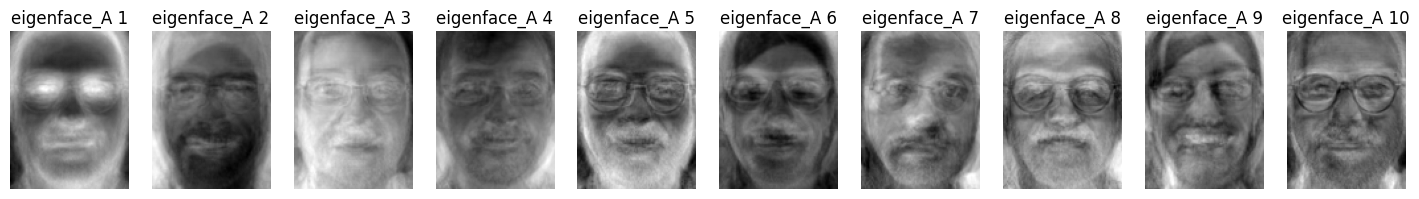

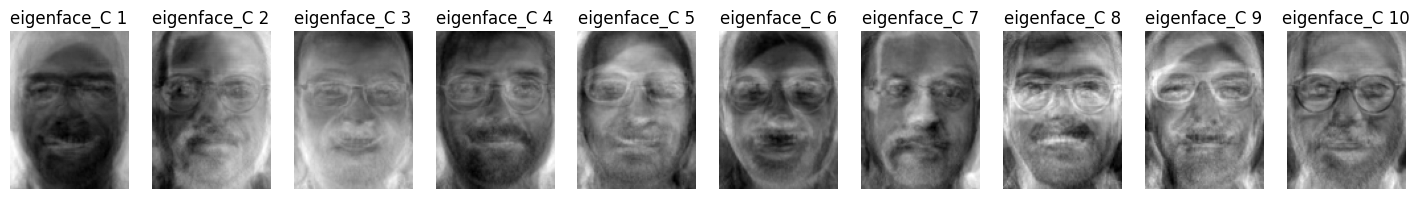

In [12]:
plotar_grade(U_A, 'eigenface_A', 1, 10, (18,3))
plotar_grade(U_C, 'eigenface_C', 1, 10, (18,3))